# The more sugar we eat the much sicker we get

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
food_data = pd.read_table("data/en.openfoodfacts.org.products.tsv", low_memory=False)

In [121]:
# Amount of NaN values for each feature
total = food_data.isnull().sum().sort_values(ascending=False)
# Percentage part of total
percent = (food_data.isnull().sum()/food_data.isnull().count()*100).round(1).sort_values(ascending=False)
# Merge series
nan_data = pd.concat({"# of NaN's": total, '% of Total': percent}, axis=1)
nan_data.head(50)

,# of NaN's,% of Total
-alpha-linolenic-acid_100g,338314,99.9
-arachidic-acid_100g,338488,100.0
-arachidonic-acid_100g,338506,100.0
-behenic-acid_100g,338489,100.0
-capric-acid_100g,338513,100.0
-caprylic-acid_100g,338514,100.0
-dihomo-gamma-linolenic-acid_100g,338489,100.0
-docosahexaenoic-acid_100g,338426,100.0
-eicosapentaenoic-acid_100g,338472,100.0
-fructose_100g,338476,100.0


In [130]:
(nan_data["% of Total"].sort_values(ascending = False)==100).count()

147

In [49]:
food_data.shape

(338515, 147)

In [170]:
food_data.columns[100:]

Index(['manganese_100g', 'selenium_100g', 'iodine_100g',
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [168]:
food_data.columns[1:100]

Index(['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'generic_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'origins', 'origins_tags',
       'manufacturing_places', 'manufacturing_places_tags', 'labels',
       'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'sta

In [52]:
food_data.info

<bound method DataFrame.info of                  code                                                url  \
0       0000000003087  http://world-en.openfoodfacts.org/product/0000...   
1       0000000004530  http://world-en.openfoodfacts.org/product/0000...   
2       0000000004559  http://world-en.openfoodfacts.org/product/0000...   
3       0000000016087  http://world-en.openfoodfacts.org/product/0000...   
4       0000000016094  http://world-en.openfoodfacts.org/product/0000...   
5       0000000016100  http://world-en.openfoodfacts.org/product/0000...   
6       0000000016117  http://world-en.openfoodfacts.org/product/0000...   
7       0000000016124  http://world-en.openfoodfacts.org/product/0000...   
8       0000000016193  http://world-en.openfoodfacts.org/product/0000...   
9       0000000016513  http://world-en.openfoodfacts.org/product/0000...   
10      0000000016612  http://world-en.openfoodfacts.org/product/0000...   
11      0000000016650  http://world-en.openfoodfacts.org

In [53]:
food_data.describe

<bound method NDFrame.describe of                  code                                                url  \
0       0000000003087  http://world-en.openfoodfacts.org/product/0000...   
1       0000000004530  http://world-en.openfoodfacts.org/product/0000...   
2       0000000004559  http://world-en.openfoodfacts.org/product/0000...   
3       0000000016087  http://world-en.openfoodfacts.org/product/0000...   
4       0000000016094  http://world-en.openfoodfacts.org/product/0000...   
5       0000000016100  http://world-en.openfoodfacts.org/product/0000...   
6       0000000016117  http://world-en.openfoodfacts.org/product/0000...   
7       0000000016124  http://world-en.openfoodfacts.org/product/0000...   
8       0000000016193  http://world-en.openfoodfacts.org/product/0000...   
9       0000000016513  http://world-en.openfoodfacts.org/product/0000...   
10      0000000016612  http://world-en.openfoodfacts.org/product/0000...   
11      0000000016650  http://world-en.openfoodfacts.o

In [54]:
food_data = food_data.dropna(axis = 1, how = 'all') # drop all empty columns
food_data.shape #(356027, 163)

(338515, 147)

In [55]:
column_product_name = food_data["product_name"]
print('non empty rows: {}'.format(column_product_name.isnull().sum()))
# column_product_name.isnull()

non empty rows: 0


In [56]:
food_data = food_data[food_data.product_name.notnull()] # drop all products without names

In [57]:
food_data.shape #(356027, 163)

(338515, 147)

In [58]:
def no_null_objects(data, columns=None):
    """
    selects rows with no NaNs
    """
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

In [59]:
no_null_objects(food_data, ["caffeine_100g"]).groupby("countries").size()

countries
Australia                          5
Australie,France                   1
Belgique                           1
Deutschland                        4
France                            34
France,Suisse                      3
France,USA                         1
Frankreich,Deutschland,Schweiz     1
Germany                            1
Québec, Canada                     1
Serbia                             1
Sverige                            1
Sweden                             1
Switzerland                        2
US                                28
United States                      5
dtype: int64

In [60]:
world_sugars = food_data[food_data.sugars_100g.notnull()]
world_sugars["nutrition-score-uk_100g"].unique()

array([ 14.,   0.,  12.,  nan,   7.,  -6.,  15.,  11.,   9.,  16.,  19.,
        -1.,   6.,  26.,  13.,  10.,  17.,  23.,  30.,   8.,  25.,  -2.,
         1.,   3.,   2.,  21.,  18.,  20.,  22.,   4.,  24.,  27.,  28.,
        -3.,  -4.,  -7.,  -5.,   5.,  29.,  31.,  -8.,  -9.,  35.,  33.,
        32.,  34., -10., -13.,  40.,  37.,  38., -11.,  36., -12., -14.,
       -15.])

In [61]:
food_data.loc[food_data.pnns_groups_2.notnull(), "pnns_groups_2"] = food_data[food_data.pnns_groups_2.notnull()].pnns_groups_2.str.lower()

In [62]:
food_data[food_data.pnns_groups_2.notnull()].pnns_groups_2.unique()

array(['unknown', 'vegetables', 'biscuits and cakes', 'bread', 'legumes',
       'sweetened beverages', 'pizza pies and quiche', 'meat', 'sweets',
       'non-sugared beverages', 'alcoholic beverages',
       'dressings and sauces', 'ice cream', 'cheese', 'one-dish meals',
       'appetizers', 'chocolate products', 'soups', 'fruits', 'cereals',
       'milk and yogurt', 'fats', 'sandwich',
       'artificially sweetened beverages', 'fruit juices', 'nuts',
       'breakfast cereals', 'eggs', 'fish and seafood', 'dried fruits',
       'processed meat', 'potatoes', 'pastries', 'dairy desserts',
       'fruit nectars', 'tripe dishes', 'salty and fatty products'],
      dtype=object)

In [63]:
corresp = dict()
corresp['cereals-and-potatoes']  = 'Cereals and potatoes'
corresp['fruits-and-vegetables'] = 'Fruits and vegetables'
corresp['sugary-snacks'] = 'Sugary snacks'
corresp['salty-snacks'] = 'Salty snacks'

In [64]:
def count_words(df, colonne = 'categories_en'):
    list_words = set()
    for word in df[colonne].str.split(','):
        if isinstance(word, float): continue
        list_words = set().union(word, list_words)       
    print("Nb of categories in '{}': {}".format(colonne, len(list_words)))
    return list(list_words)

In [65]:
food_data['pnns_groups_1'] = food_data['pnns_groups_1'].replace(corresp)
pnns_group1_keys = count_words(food_data, 'pnns_groups_1')
pnns_group1_keys

Nb of categories in 'pnns_groups_1': 10


['Sugary snacks',
 'Fat and sauces',
 'Milk and dairy products',
 'unknown',
 'Fish Meat Eggs',
 'Cereals and potatoes',
 'Salty snacks',
 'Fruits and vegetables',
 'Beverages',
 'Composite foods']

In [66]:
food_data[food_data.pnns_groups_1.notnull()].pnns_groups_1.unique()

array(['unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Beverages', 'Composite foods',
       'Fish Meat Eggs', 'Fat and sauces', 'Milk and dairy products',
       'Salty snacks'], dtype=object)

No handles with labels found to put in legend.


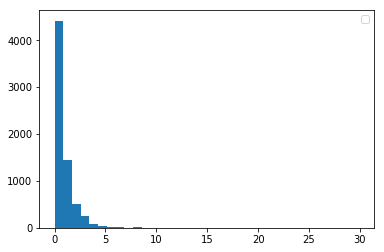

In [118]:
# plt.hist(choose_not_null_rows(food_data, "unknown", "sugars_100g"), bins = 35)
# plt.hist(choose_not_null_rows(food_data, "Fruits and vegetables", "sugars_100g"), bins = 35)
# plt.hist(choose_not_null_rows(food_data, "Beverages", "sugars_100g"), bins = 35)
plt.hist(choose_not_null_rows(food_data, "Fish Meat Eggs", "sugars_100g"), bins = 35)
# plt.hist(choose_not_null_rows(food_data, "Fat and sauces", "sugars_100g"), bins = 35)
# plt.hist(choose_not_null_rows(food_data, "Milk and dairy products", "sugars_100g"), bins = 35)

plt.legend()

In [107]:
def choose_not_null_rows(dataframe, category, ingredient):  
    return dataframe[dataframe.pnns_groups_1 == category][ingredient][dataframe[dataframe.pnns_groups_1 == category][ingredient].notnull()]

(array([5.380e+02, 1.140e+02, 2.920e+02, 4.430e+02, 4.630e+02, 6.430e+02,
        1.347e+03, 1.045e+03, 1.031e+03, 9.900e+02, 7.530e+02, 9.460e+02,
        1.124e+03, 9.290e+02, 5.830e+02, 2.590e+02, 1.910e+02, 9.200e+01,
        1.340e+02, 2.010e+02, 4.400e+01, 5.800e+01, 6.200e+01, 9.700e+01,
        1.570e+02, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.        ,   4.14285714,   8.28571429,  12.42857143,
         16.57142857,  20.71428571,  24.85714286,  29.        ,
         33.14285714,  37.28571429,  41.42857143,  45.57142857,
         49.71428571,  53.85714286,  58.        ,  62.14285714,
         66.28571429,  70.42857143,  74.57142857,  78.71428571,
         82.85714286,  87.        ,  91.14285714,  95.28571429,
         99.42857143, 103.57142857, 107.71428571, 111.85714286,
        116.        , 120.14285714, 124.28571429, 128.42857143,
        132.57142857, 136.71428571, 140.85714286, 145

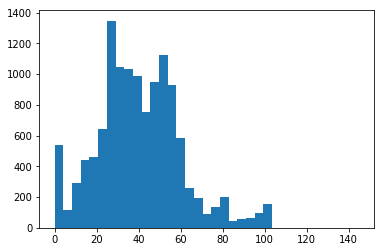

In [108]:
plt.hist(choose_not_null_rows(food_data, "Sugary snacks", "sugars_100g"), bins = 35)

(array([1.515e+03, 1.614e+03, 1.623e+03, 9.740e+02, 5.610e+02, 2.940e+02,
        1.430e+02, 8.600e+01, 4.500e+01, 2.900e+01, 1.700e+01, 1.400e+01,
        1.500e+01, 6.000e+00, 7.000e+00, 3.000e+00, 5.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0.        ,  0.94285714,  1.88571429,  2.82857143,  3.77142857,
         4.71428571,  5.65714286,  6.6       ,  7.54285714,  8.48571429,
         9.42857143, 10.37142857, 11.31428571, 12.25714286, 13.2       ,
        14.14285714, 15.08571429, 16.02857143, 16.97142857, 17.91428571,
        18.85714286, 19.8       , 20.74285714, 21.68571429, 22.62857143,
        23.57142857, 24.51428571, 25.45714286, 26.4       , 27.34285714,
        28.28571429, 29.22857143, 30.17142857, 31.11428571, 32.05714286,
        33.        ]),
 <a list of 35 Patch objects>)

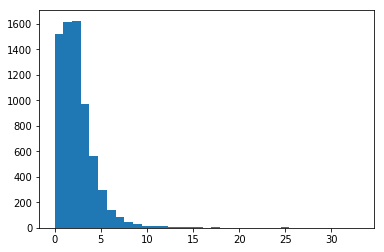

In [109]:
plt.hist(choose_not_null_rows(food_data, "Composite foods", "sugars_100g"), bins = 35)

In [154]:
# Amount of NaN values for each feature
total = food_data.isnull().sum().sort_values(ascending=False)
# Percentage part of total
percent = (food_data.isnull().sum()/food_data.isnull().count()*100).round(1).sort_values(ascending=False)
# Merge series
nan_data = pd.concat({"Qnty of NaN's": total, '% of Total': percent}, axis=1)
nan_data.head(50)

,% of Total,Qnty of NaN's
-alpha-linolenic-acid_100g,99.9,338314
-arachidic-acid_100g,100.0,338488
-behenic-acid_100g,100.0,338489
-dihomo-gamma-linolenic-acid_100g,100.0,338489
-docosahexaenoic-acid_100g,100.0,338426
-eicosapentaenoic-acid_100g,100.0,338472
-fructose_100g,100.0,338476
-gamma-linolenic-acid_100g,100.0,338488
-glucose_100g,100.0,338491
-lactose_100g,99.9,338246


In [155]:
columns_to_drop = nan_data[nan_data["% of Total"].sort_values(ascending = False)==100].index

C:\Users\Obache\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [156]:
food_data.drop(columns_to_drop, axis=1, inplace=True)

In [157]:
food_data.shape

(338515, 110)

In [178]:
food_data[food_data.product_name.str.contains("donut")== True].energy_100g.mean()

1906.75

In [177]:
food_data[food_data.product_name.str.contains("cereal")== True].energy_100g.mean()

1392.1285714285711

In [183]:
food_data[food_data.product_name.str.contains("piadina")== True].energy_100g.count()

1

In [175]:
food_data[food_data.product_name.str.contains("scone")== True].energy_100g.mean()

1432.0

In [187]:
food_data.groupby("sugars_100g").count()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,manganese_100g,selenium_100g,iodine_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
sugars_100g,,,,,,,,,,,,,,,,,,,,,
-17.8600,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
-6.6700,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-6.2500,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
-3.5700,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
-1.2000,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
-0.8000,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1
-0.1000,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
0.0000,39797,39797,39797,39797,39797,39797,39797,39797,3067,5482,...,125,209,38,84,1,62,6,27,35150,35150
0.0001,17,17,17,17,17,17,17,17,3,7,...,0,0,0,0,0,0,0,1,17,17


In [198]:
food_data[(food_data.product_name.str.contains("cream")== True) & (food_data.product_name.str.contains("ice")== True)].sugars_100g.mean()

27.284166666666664

In [221]:
food_data[food_data.product_name.str.contains("pizza")== True].sugars_100g.mean()

2.7569421487603307

In [207]:
food_data[food_data.product_name.str.contains("chocolate")== True].sugars_100g.mean()

31.747232142857136

In [195]:
food_data[food_data.product_name.str.contains("chips")== True].sugars_100g.mean()

8.148497409326431

In [215]:
food_data[food_data.product_name.str.contains("cheese")== True].sugars_100g.mean()

4.846845454545456

{'boxes': [<matplotlib.lines.Line2D at 0x1340ee5df98>],
 'caps': [<matplotlib.lines.Line2D at 0x1340ee729e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1340ee7f6a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1340ee7f278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1340ee72128>,
  <matplotlib.lines.Line2D at 0x1340ee725c0>]}

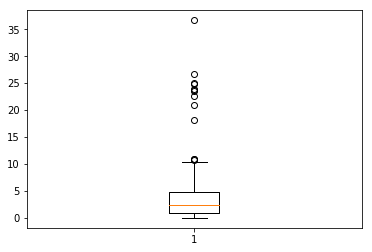

In [250]:
plt.boxplot(food_data[food_data.product_name.str.contains("cheese")== True][food_data[food_data.product_name.str.contains("cheese")== True].sugars_100g.notnull()].sugars_100g)

In [201]:
junk_foods = pd.DataFrame([('ice', 51),
 ('cream', 49),
 ('pizza', 40),
 ('chocolate', 34),
 ('chips', 34),
 ('cheese', 23)], columns={"food", "qnty"})

In [202]:
junk_foods

,food,qnty
0,ice,51
1,cream,49
2,pizza,40
3,chocolate,34
4,chips,34
5,cheese,23


In [208]:
def get_mean_sugars_by_food(food):
    food_data[food_data.product_name.str.contains(food) == True].sugars_100g.mean()

In [233]:
current_list2 = []
for i in junk_foods.food:
    current_list2.append([i, food_data[food_data.product_name.str.contains(i) == True].sugars_100g.mean()])

In [234]:
current_list2

[['ice', 12.008957940755357],
 ['cream', 27.181484615384626],
 ['pizza', 2.7569421487603307],
 ['chocolate', 31.747232142857136],
 ['chips', 8.148497409326431],
 ['cheese', 4.846845454545456]]

In [235]:
new_data = pd.DataFrame(current_list2)
new_data.columns = ["food", "sugars"]
new_data

,food,sugars
0,ice,12.008958
1,cream,27.181485
2,pizza,2.756942
3,chocolate,31.747232
4,chips,8.148497
5,cheese,4.846845


In [236]:
new_table = pd.concat([junk_foods, new_data], axis = 1)
new_table.index = new_table.food
new_table.drop("food", axis = 1)

,qnty,sugars
"(ice, ice)",51,12.008958
"(cream, cream)",49,27.181485
"(pizza, pizza)",40,2.756942
"(chocolate, chocolate)",34,31.747232
"(chips, chips)",34,8.148497
"(cheese, cheese)",23,4.846845


In [237]:
new_table.corr()

,qnty,sugars
qnty,1.000000,0.290917
sugars,0.290917,1.000000
